# Meter A

## Data pre-processing

1. Import needed libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import *
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

2. import dataset

In [3]:
raw_data = pd.read_csv('dataset\Meter A', sep='\t', header=None)
#assigning the columns
raw_data.columns = ['Flatness ratio', 'Symmetry', 'Crossflow',
            'Flow Velocity P1','Flow Velocity P2','Flow Velocity P3','Flow Velocity P4',
            'Flow Velocity P5','Flow Velocity P6','Flow Velocity P7','Flow Velocity P8',
            'Speed of Sound P1','Speed of Sound P2','Speed of Sound P3','Speed of Sound P4',
            'Speed of Sound P5','Speed of Sound P6','Speed of Sound P7','Speed of Sound P8',
            'Average Speed of Sound', 
            'Gain P1T','Gain P1R','Gain P2T','Gain P2R',
             'Gain P3T','Gain P3R','Gain P4T','Gain P4R',
             'Gain P5T','Gain P5R','Gain P6T','Gain P6R',
             'Gain P7T','Gain P7R','Gain P8T','Gain P8R'
            ,'Class']
raw_data

,Flatness ratio,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Flow Velocity P5,Flow Velocity P6,Flow Velocity P7,...,Gain P4R,Gain P5T,Gain P5R,Gain P6T,Gain P6R,Gain P7T,Gain P7R,Gain P8T,Gain P8R,Class
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,...,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,2
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,...,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,2
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,...,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,2
85,0.796730,1.010570,0.999029,2.714849,3.412818,3.388927,2.692776,2.738119,3.413739,3.381779,...,32.555338,33.774415,33.302410,36.640627,36.699218,35.859377,35.849610,33.816732,33.011067,2


3. Check for duplicates

In [4]:
dups = raw_data.duplicated()
print("There are {} duplicate rows".format(dups.sum()))

There are 0 duplicate rows


<font size="5" color='blue'> There are no duplicates n the Dataset </font>

4. Check for missing values

In [5]:
# count the rows and columns in a DataFrame
print("\nNumber of rows and column in our DataFrame = ",raw_data.shape)
res = raw_data.notnull()
print("\nDataFrame displaying False for Null (NaN) value = \n",res)

raw_data = raw_data.dropna()
print("\nDataFrame after removing null values...\n",raw_data)
print("\n(Updated) Number of rows and column in our DataFrame = ",raw_data.shape)


Number of rows and column in our DataFrame =  (87, 37)

DataFrame displaying False for Null (NaN) value = 
     Flatness ratio  Symmetry  Crossflow  Flow Velocity P1  Flow Velocity P2  \
0             True      True       True              True              True   
1             True      True       True              True              True   
2             True      True       True              True              True   
3             True      True       True              True              True   
4             True      True       True              True              True   
..             ...       ...        ...               ...               ...   
82            True      True       True              True              True   
83            True      True       True              True              True   
84            True      True       True              True              True   
85            True      True       True              True              True   
86            True    

<font size="5" color='blue'> No missing values found</font> 

5. Check for 0 values

In [6]:
#check for any 0 value in any column
raw_data.eq(0).any()

Flatness ratio            False
Symmetry                  False
Crossflow                 False
Flow Velocity P1          False
Flow Velocity P2          False
Flow Velocity P3          False
Flow Velocity P4          False
Flow Velocity P5          False
Flow Velocity P6          False
Flow Velocity P7          False
Flow Velocity P8          False
Speed of Sound P1         False
Speed of Sound P2         False
Speed of Sound P3         False
Speed of Sound P4         False
Speed of Sound P5         False
Speed of Sound P6         False
Speed of Sound P7         False
Speed of Sound P8         False
Average Speed of Sound    False
Gain P1T                  False
Gain P1R                  False
Gain P2T                  False
Gain P2R                  False
Gain P3T                  False
Gain P3R                  False
Gain P4T                  False
Gain P4R                  False
Gain P5T                  False
Gain P5R                  False
Gain P6T                  False
Gain P6R

<font size="5" color='blue'> No 0 values found</font> 

6. Check for outliers and remove

In [7]:
raw_data = raw_data[(np.abs(stats.zscore(raw_data)) < 3).all(axis=1)]
data_no_outlier = raw_data # rename data
data_no_outlier = data_no_outlier.reset_index(drop=True)
data_no_outlier

,Flatness ratio,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Flow Velocity P5,Flow Velocity P6,Flow Velocity P7,...,Gain P4R,Gain P5T,Gain P5R,Gain P6T,Gain P6R,Gain P7T,Gain P7R,Gain P8T,Gain P8R,Class
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,...,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,2
79,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,...,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,2
80,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,...,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,2
81,0.796730,1.010570,0.999029,2.714849,3.412818,3.388927,2.692776,2.738119,3.413739,3.381779,...,32.555338,33.774415,33.302410,36.640627,36.699218,35.859377,35.849610,33.816732,33.011067,2


4 rows removed due for z-score

<AxesSubplot:>

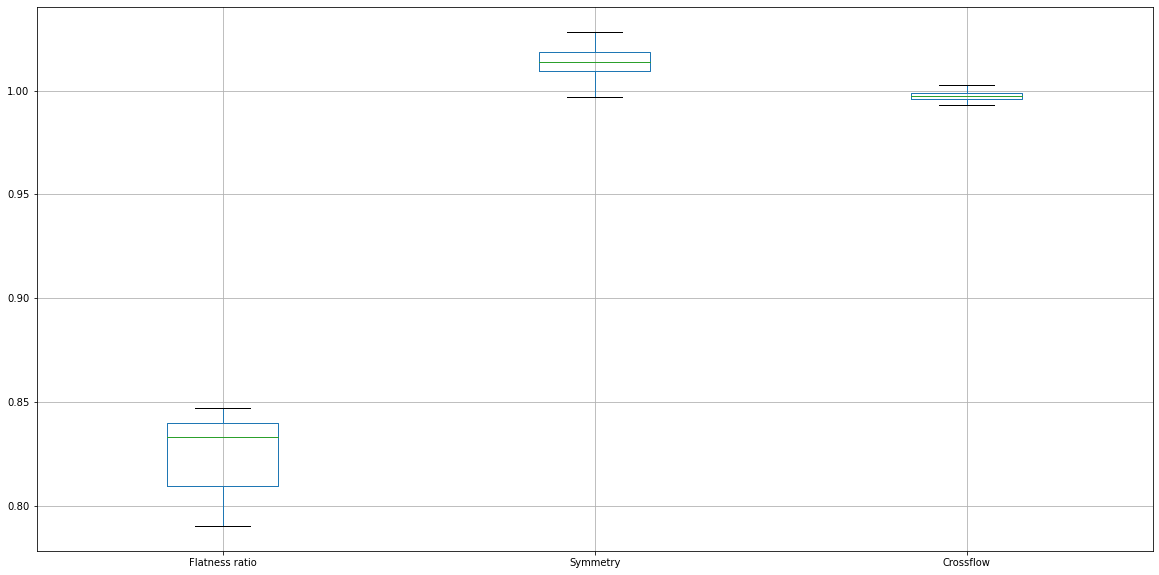

In [8]:
data_no_outlier[['Flatness ratio', 'Symmetry', 'Crossflow']].boxplot(figsize=(20,10))

<AxesSubplot:>

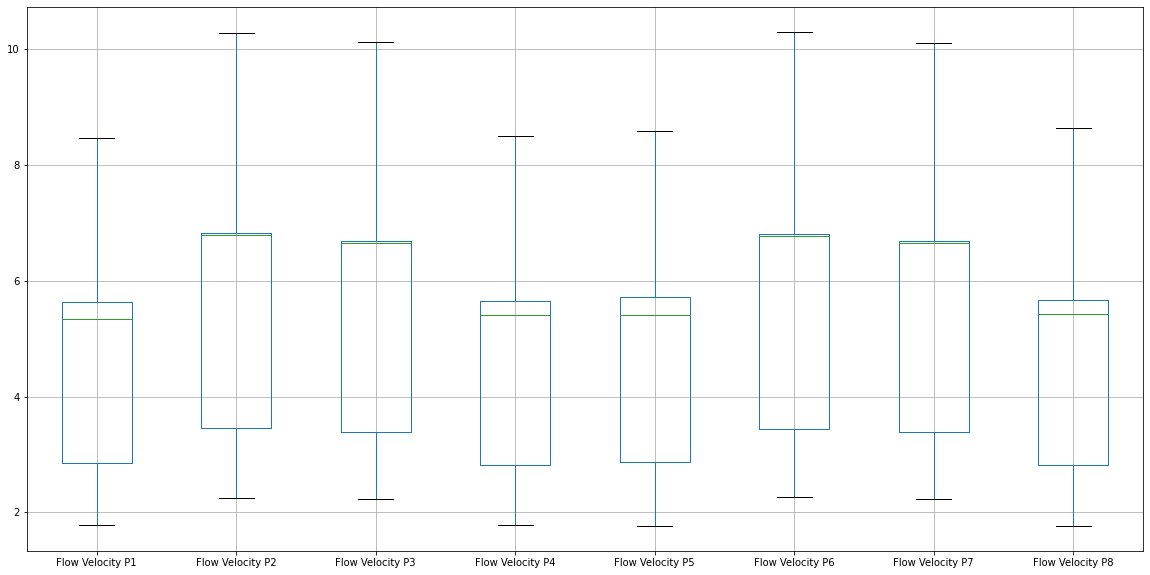

In [9]:
data_no_outlier[['Flow Velocity P1','Flow Velocity P2','Flow Velocity P3','Flow Velocity P4',
            'Flow Velocity P5','Flow Velocity P6','Flow Velocity P7','Flow Velocity P8']].boxplot(figsize=(20,10))

(83, 37)

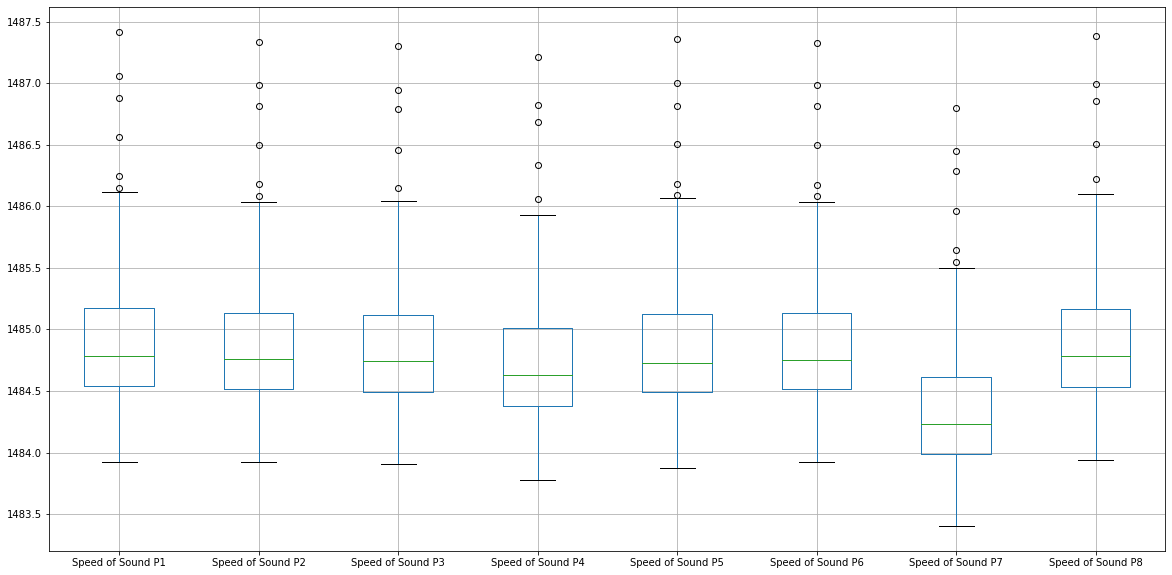

In [10]:
data_no_outlier[['Speed of Sound P1','Speed of Sound P2','Speed of Sound P3','Speed of Sound P4',
            'Speed of Sound P5','Speed of Sound P6','Speed of Sound P7','Speed of Sound P8']].boxplot(figsize=(20,10))
data_no_outlier.shape

<font size="5" color='blue'> Found some outliers removing them </font> 

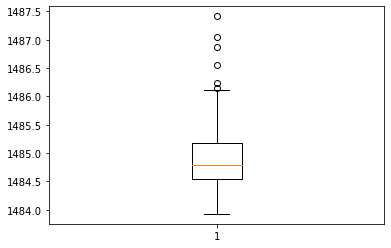

<Figure size 720x504 with 0 Axes>

IQR: 0.6309165000000121 Upper bound: 1486.12062475 Lower bound: 1483.5969587499999
Number of outliers: 6
The following are the outliers in the boxplot: 
17    1487.056833
18    1486.562167
19    1486.147000
65    1487.415667
66    1486.878667
67    1486.243500
Name: Speed of Sound P1, dtype: float64


(83, 37)

In [11]:
val_1 = data_no_outlier['Speed of Sound P1']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
q1 = np.quantile(val_1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(val_1, 0.75)
med = np.median(val_1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('IQR:',iqr, 'Upper bound:',upper_bound, 'Lower bound:',lower_bound)


outliers = val_1[(val_1 <= lower_bound) | (val_1 >= upper_bound)]
print("Number of outliers: "+ str(len(outliers)))
print('The following are the outliers in the boxplot: \n{}'.format(outliers))
data_no_outlier.shape

<font size="5" color='blue'> Removing 6 rows</font> 

(77,)


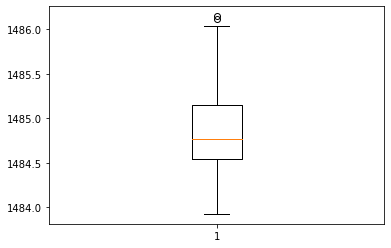

<Figure size 720x504 with 0 Axes>

After remove IQT outliers Shape: (77, 37)


,Flatness ratio,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Flow Velocity P5,Flow Velocity P6,Flow Velocity P7,...,Gain P4R,Gain P5T,Gain P5R,Gain P6T,Gain P6R,Gain P7T,Gain P7R,Gain P8T,Gain P8R,Class
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,...,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,2
73,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,...,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,2
74,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,...,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,2
75,0.796730,1.010570,0.999029,2.714849,3.412818,3.388927,2.692776,2.738119,3.413739,3.381779,...,32.555338,33.774415,33.302410,36.640627,36.699218,35.859377,35.849610,33.816732,33.011067,2


In [12]:
data_no_outlier.drop(data_no_outlier.index[[17,18,29,65,66,67]],inplace=True)
data_no_outlier = data_no_outlier.reset_index(drop=True)

val_2 = data_no_outlier['Speed of Sound P1']
print(val_2.shape)
plt.boxplot(val_2)
fig = plt.figure(figsize =(10, 7))
plt.show()


print('After remove IQT outliers Shape: '+str(data_no_outlier.shape))
data_no_outlier

<AxesSubplot:>

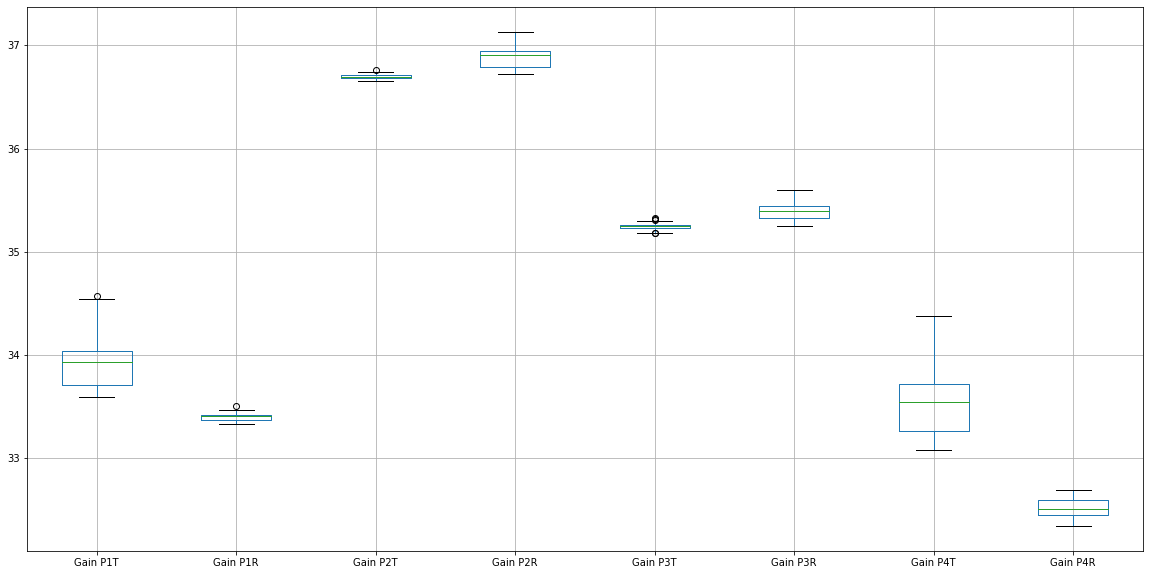

In [13]:
data_no_outlier[['Gain P1T','Gain P1R','Gain P2T','Gain P2R',
             'Gain P3T','Gain P3R','Gain P4T','Gain P4R']].boxplot(figsize=(20,10))

<AxesSubplot:>

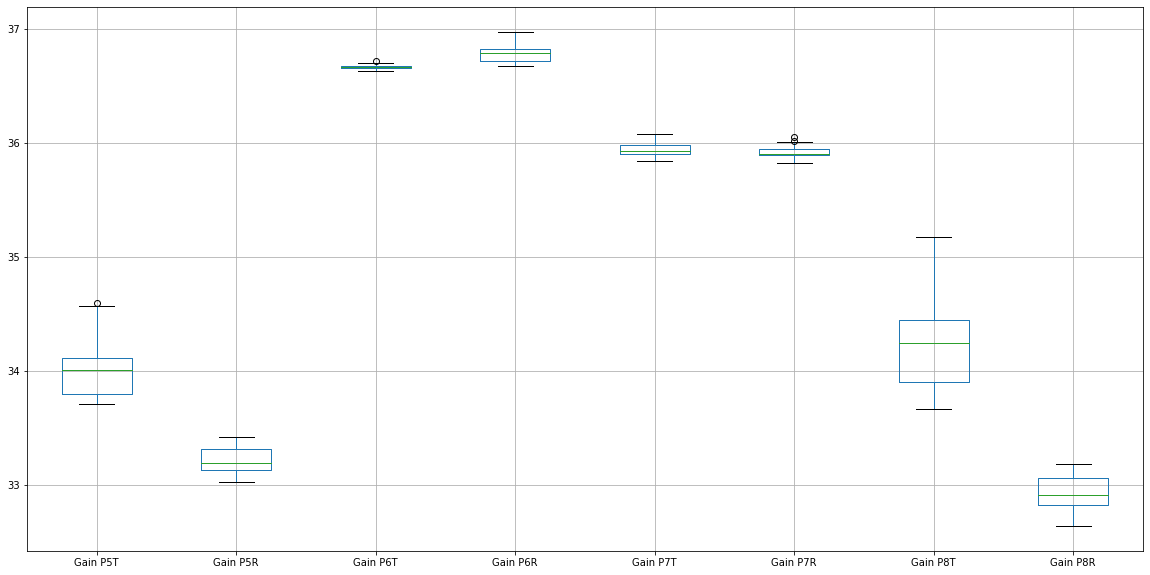

In [14]:
data_no_outlier[['Gain P5T','Gain P5R','Gain P6T','Gain P6R',
             'Gain P7T','Gain P7R','Gain P8T','Gain P8R']].boxplot(figsize=(20,10))

Count Label

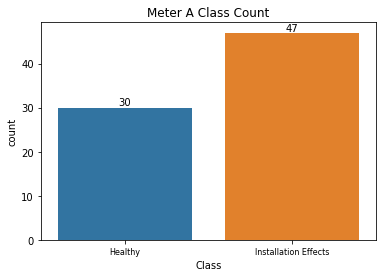

In [51]:
ax = sns.countplot(x=data_no_outlier['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Installation Effects'], fontsize=8) 
ax.set_title("Meter A Class Count")
plt.show()

7. PCA

In [16]:
from sklearn.preprocessing import StandardScaler

featuresCol=['Flatness ratio', 'Symmetry', 'Crossflow',
            'Flow Velocity P1','Flow Velocity P2','Flow Velocity P3','Flow Velocity P4',
            'Flow Velocity P5','Flow Velocity P6','Flow Velocity P7','Flow Velocity P8',
            'Speed of Sound P1','Speed of Sound P2','Speed of Sound P3','Speed of Sound P4',
            'Speed of Sound P5','Speed of Sound P6','Speed of Sound P7','Speed of Sound P8',
            'Average Speed of Sound', 
            'Gain P1T','Gain P1R','Gain P2T','Gain P2R',
             'Gain P3T','Gain P3R','Gain P4T','Gain P4R',
             'Gain P5T','Gain P5R','Gain P6T','Gain P6R',
             'Gain P7T','Gain P7R','Gain P8T','Gain P8R']
# Separating out the features
X = data_no_outlier.loc[:, featuresCol].values

# Separating out the target
Y =data_no_outlier.loc[:,['Class']].values

# standardising the features
X_standard = StandardScaler().fit_transform(X)
X = pd.DataFrame(data=X)
print(X.shape)
print(data_no_outlier.shape)
print(X_standard.shape)
print(Y.shape)

(77, 36)
(77, 37)
(77, 36)
(77, 1)


In [17]:
from sklearn.decomposition import PCA
pcaE = PCA(.95)
X_pca = pcaE.fit_transform(X_standard)
print(X_pca.shape)
print(pcaE.explained_variance_ratio_)

(77, 4)
[0.70938131 0.15302177 0.08295009 0.01547878]


Plotting the PCA

[0.7382990484720097, 0.1592596566708225, 0.08633152508225485, 0.016109769774913053]


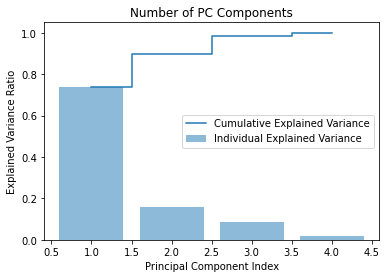

In [18]:
tot = sum(pcaE.explained_variance_)
var_exp = [(i / tot) for i in sorted(pcaE.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)

plt.bar(range(1,5), var_exp , alpha=0.5,
        align='center', label='Individual Explained Variance')
plt.step(range(1,5), cum_var_exp, where='mid',
         label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Number of PC Components')
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'Cumulative Varience')

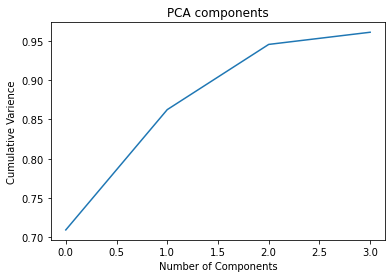

In [19]:
plt.plot(np.cumsum(pcaE.explained_variance_ratio_))
plt.title('PCA components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Varience')

Scatterplot before PCA

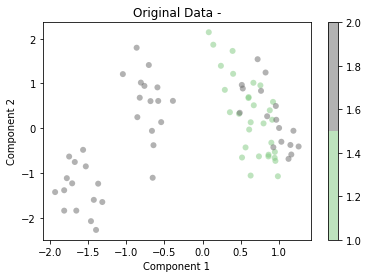

In [20]:
plt.scatter(X_standard[:, 0], X_standard[:, 1],
            c=data_no_outlier['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 2))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Original Data -')
plt.colorbar()

Scatterplot of PCA

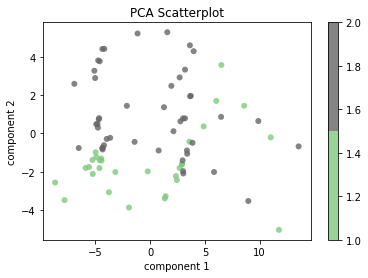

In [21]:
colors = {'1':'b', '0':'r'}
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=Y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('Accent', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('PCA Scatterplot')
plt.colorbar()

do K-means with PCA data

In [22]:
kmeans_pca = cluster.KMeans(n_clusters =2,init='k-means++',random_state=0)
kmeans_pca.fit(X_pca)

KMeans(n_clusters=2, random_state=0)

In [23]:
df_segm_pca_kmeans = pd.concat([data_no_outlier.reset_index(drop=True),pd.DataFrame(X_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-4:] =['PC1','PC2','PC3','PC4']
df_segm_pca_kmeans['K-means']= kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Flatness ratio,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Flow Velocity P5,Flow Velocity P6,Flow Velocity P7,...,Gain P7T,Gain P7R,Gain P8T,Gain P8R,Class,PC1,PC2,PC3,PC4,K-means
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,36.075847,36.051432,35.174155,32.729490,1,11.763125,-5.038364,-1.081400,-0.692683,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,36.054688,35.979818,34.847005,32.731122,1,11.007865,-0.202063,-3.065475,-0.866917,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,36.002605,35.963542,34.689128,32.771810,1,8.588554,1.448741,-3.472862,-0.344027,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,35.974935,35.955403,34.500328,32.849935,1,2.908464,-1.623628,0.477559,0.523401,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,35.996095,35.968425,34.474283,32.853190,1,1.415464,-3.278209,3.081018,0.488174,1


compare Kmeans classes with OG classes

C:\Users\Fishsticks\.conda\envs\CSC3005\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


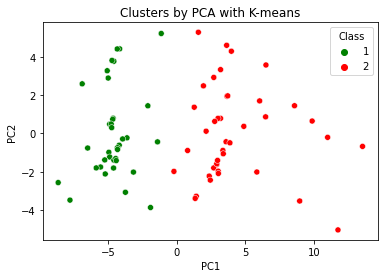

In [24]:
df_segm_pca_kmeans['Class']=df_segm_pca_kmeans['K-means'].map({0:1,1:2,2:3})

x= df_segm_pca_kmeans['PC1']
y= df_segm_pca_kmeans['PC2']
sns.scatterplot(x,y,hue=df_segm_pca_kmeans['Class'],palette=['g','r'])
plt.title('Clusters by PCA with K-means')
plt.show()

C:\Users\Fishsticks\AppData\Local\Temp\ipykernel_304\1661672821.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure(figsize=(12,9)).gca(projection='3d')


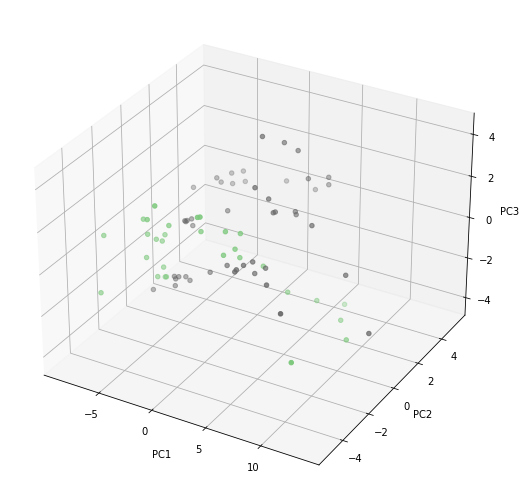

In [25]:
fig = plt.figure(figsize=(12,9)).gca(projection='3d')
fig.scatter(df_segm_pca_kmeans['PC1'],df_segm_pca_kmeans['PC2']
            ,df_segm_pca_kmeans['PC3'],cmap=plt.cm.get_cmap('Accent', 2),c=Y)
fig.set_xlabel('PC1')
fig.set_ylabel('PC2')
fig.set_zlabel('PC3')
_ = plt.show()

Feature Importance

In [26]:
df_pca = pd.DataFrame(abs(pcaE.components_), columns=featuresCol)
df_pca = df_pca.set_axis(['PC1','PC2','PC3','PC4'])
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
df_pca

,Flatness ratio,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Flow Velocity P5,Flow Velocity P6,Flow Velocity P7,...,Gain P4T,Gain P4R,Gain P5T,Gain P5R,Gain P6T,Gain P6R,Gain P7T,Gain P7R,Gain P8T,Gain P8R
PC1,0.03619,0.08991,0.13226,0.19358,0.19392,0.19393,0.19368,0.19359,0.19397,0.19388,...,0.19149,0.17213,0.19313,0.18357,0.08479,0.18883,0.16264,0.15114,0.19137,0.18657
PC2,0.34231,0.20779,0.00498,0.05526,0.03628,0.03297,0.05091,0.05490,0.03570,0.03288,...,0.08194,0.13899,0.07313,0.06307,0.32830,0.11518,0.22310,0.25563,0.07945,0.06050
PC3,0.18490,0.18558,0.17867,0.08833,0.10111,0.10302,0.09041,0.08949,0.10091,0.10393,...,0.06297,0.18903,0.04008,0.17643,0.15058,0.02356,0.00782,0.03075,0.07613,0.16321
PC4,0.18845,0.83093,0.39474,0.02676,0.01525,0.02091,0.04942,0.02235,0.01406,0.02038,...,0.06992,0.11485,0.00362,0.05191,0.06349,0.03803,0.01922,0.03135,0.04460,0.03662


PC1

In [27]:
df_pc1 =df_pca.iloc[[0]]
a = abs(pcaE.components_[0])
b = zip(featuresCol,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc1 = pd.DataFrame(values,columns=columns)
df_pc1

,Flow Velocity P6,Flow Velocity P3,Flow Velocity P2,Flow Velocity P7,Flow Velocity P8,Flow Velocity P4,Flow Velocity P5,Flow Velocity P1,Gain P5T,Gain P1T,...,Speed of Sound P7,Gain P7T,Gain P7R,Crossflow,Gain P2T,Symmetry,Gain P6T,Gain P3T,Gain P1R,Flatness ratio
0,0.19397,0.19393,0.19392,0.19388,0.19371,0.19368,0.19359,0.19358,0.19313,0.19212,...,0.16341,0.16264,0.15114,0.13226,0.12284,0.08991,0.08479,0.07351,0.04436,0.03619


PC2

In [28]:
df_pc2 =df_pca.iloc[[1]]
a = abs(pcaE.components_[1])
b = zip(featuresCol,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc2 = pd.DataFrame(values,columns=columns)
df_pc2

,Gain P3T,Flatness ratio,Gain P6T,Gain P1R,Gain P7R,Gain P7T,Gain P2T,Symmetry,Speed of Sound P2,Speed of Sound P7,...,Gain P8R,Flow Velocity P1,Flow Velocity P5,Flow Velocity P8,Flow Velocity P4,Flow Velocity P2,Flow Velocity P6,Flow Velocity P3,Flow Velocity P7,Crossflow
0,0.35500,0.34231,0.32830,0.32682,0.25563,0.22310,0.21429,0.20779,0.15845,0.15827,...,0.06050,0.05526,0.05490,0.05216,0.05091,0.03628,0.03570,0.03297,0.03288,0.00498


PC3

In [29]:
df_pc3 =df_pca.iloc[[2]]
a = abs(pcaE.components_[2])
b = zip(featuresCol,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc3 = pd.DataFrame(values,columns=columns)
df_pc3

,Gain P1R,Gain P2T,Speed of Sound P3,Speed of Sound P7,Speed of Sound P2,Speed of Sound P6,Average Speed of Sound,Speed of Sound P8,Speed of Sound P4,Speed of Sound P5,...,Flow Velocity P1,Gain P8T,Gain P4T,Gain P1T,Gain P2R,Gain P5T,Gain P3R,Gain P7R,Gain P6R,Gain P7T
0,0.26271,0.25735,0.24553,0.24528,0.24503,0.24499,0.24141,0.23872,0.23803,0.23695,...,0.08833,0.07613,0.06297,0.05873,0.04503,0.04008,0.03345,0.03075,0.02356,0.00782


PC4

In [30]:
df_pc4 =df_pca.iloc[[3]]
a = abs(pcaE.components_[3])
b = zip(featuresCol,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc4 = pd.DataFrame(values,columns=columns)
df_pc4

,Symmetry,Crossflow,Gain P1R,Flatness ratio,Gain P4R,Gain P3T,Gain P4T,Gain P6T,Gain P5R,Flow Velocity P4,...,Flow Velocity P2,Speed of Sound P1,Flow Velocity P6,Speed of Sound P3,Average Speed of Sound,Speed of Sound P7,Gain P1T,Gain P5T,Speed of Sound P8,Speed of Sound P4
0,0.83093,0.39474,0.25425,0.18845,0.11485,0.10504,0.06992,0.06349,0.05191,0.04942,...,0.01525,0.01510,0.01406,0.01199,0.01172,0.01134,0.01030,0.00362,0.00242,0.00193


## Biplots

PC1 and PC2

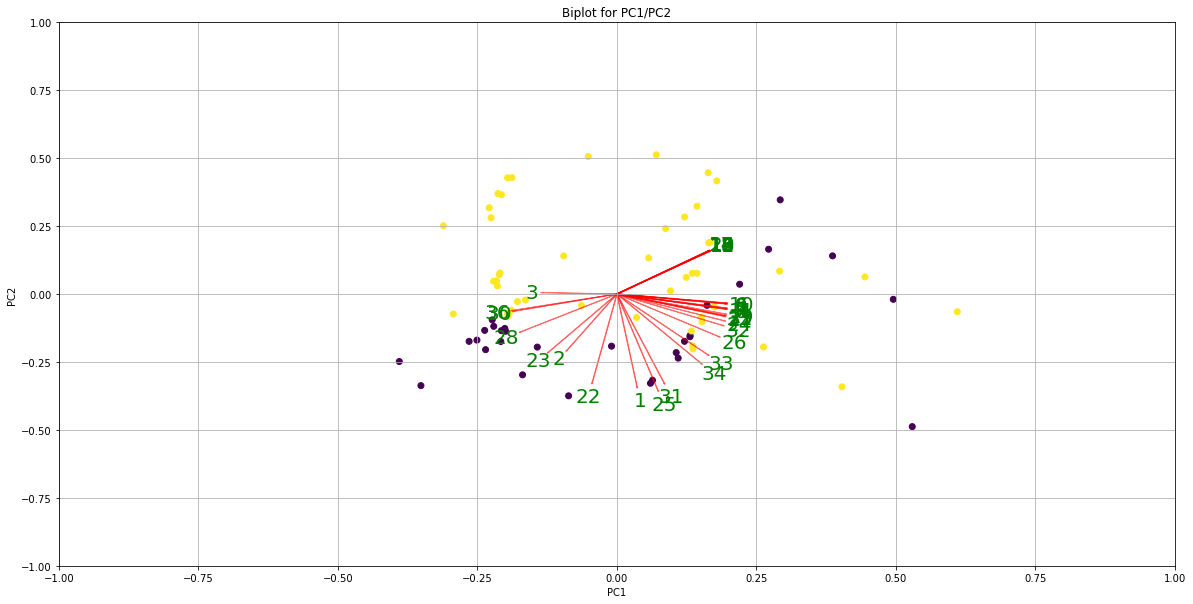

In [31]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    y= data_no_outlier['Class']
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(i+1),fontsize=20, color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pcaE.components_[0:2, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC1/PC2')
plt.xlabel("PC1".format(1))
plt.ylabel("PC2".format(2))
plt.show()

PC3 and PC4

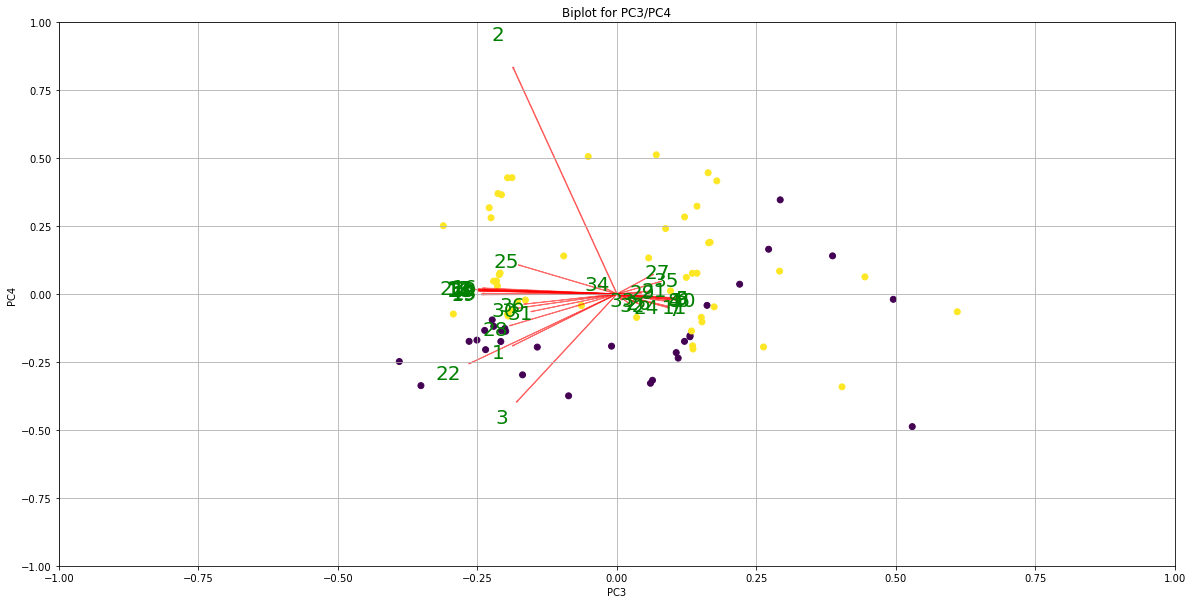

In [32]:
#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pcaE.components_[2:4, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC3/PC4')
plt.xlabel("PC3".format(1))
plt.ylabel("PC4".format(2))
plt.show()

# Data mining

Compare 70/30 vs 80/20

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

Y = np.reshape(Y,-1)
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, Y, test_size=0.3, random_state=0)

## Supervised Learning

### Linear Prediction using Logistics Regression

Model score clf3: 0.6875
Highest training accuracy: 0.875
Highest testing accuracy: 0.875
Lowest testing accuracy: 0.6875


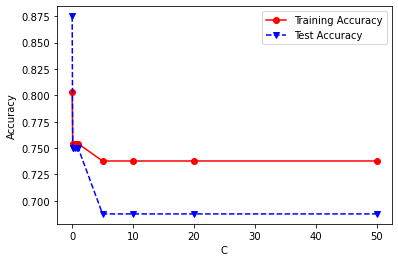

In [34]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtrainAcc = []
LRtestAcc = []

for param in C:
    clf3 = linear_model.LogisticRegression(C=param)
    clf3.fit(X_train, y_train)
    Y_predTrain = clf3.predict(X_train)
    Y_predTest = clf3.predict(X_test)
    LRtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')


print (f"Model score clf3: {clf3.score(X_test, y_test)}")
print("Highest training accuracy:", max(LRtestAcc))
print("Highest testing accuracy:", max(LRtestAcc))
print("Lowest testing accuracy:", min(LRtestAcc))

### Linear Support Vector Machine

Model score clf4: 0.6875
Highest training accuracy: 0.8125
Highest testing accuracy: 0.8125
Lowest testing accuracy: 0.6875


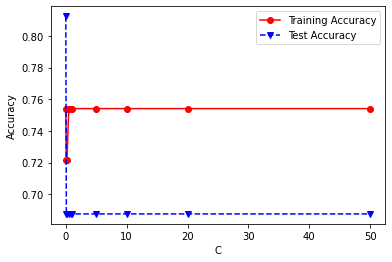

In [35]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf4 = SVC(C=param,kernel='linear')
    clf4.fit(X_train, y_train)
    Y_predTrain = clf4.predict(X_train)
    Y_predTest = clf4.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')

print (f"Model score clf4: {clf4.score(X_test, y_test)}")
print("Highest training accuracy:", max(SVMtestAcc))
print("Highest testing accuracy:", max(SVMtestAcc))
print("Lowest testing accuracy:", min(SVMtestAcc))

### Non-linear Support Vector Machine

Model score: 0.875
Highest training accuracy: 0.9375
Highest testing accuracy: 0.9375
Lowest testing accuracy: 0.75


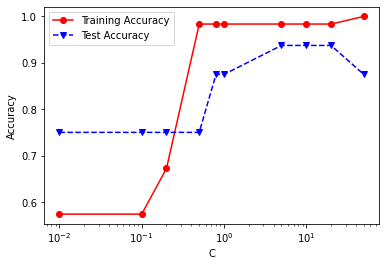

In [36]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf5 = SVC(C=param,kernel='rbf',gamma='auto',random_state=0)
    clf5.fit(X_train, y_train)
    Y_predTrain = clf5.predict(X_train)
    Y_predTest = clf5.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

print (f"Model score: {clf5.score(X_test, y_test)}")
print("Highest training accuracy:", max(SVMtestAcc))
print("Highest testing accuracy:", max(SVMtestAcc))
print("Lowest testing accuracy:", min(SVMtestAcc))

### Decision Tree

Model score: 0.9375
Highest training accuracy: 1.0
Highest testing accuracy: 1.0
Lowest testing accuracy: 0.9375


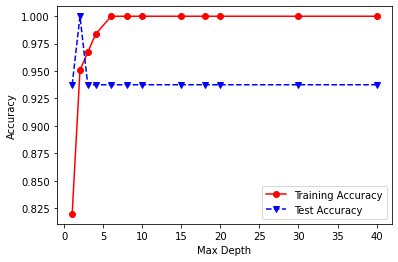

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf7 = DecisionTreeClassifier(max_depth=10)
maxdepth = [1,2,3,4,6,8,10,15,18,20,30,40]
dt_trainAcc = []
dt_testAcc = []

for param in maxdepth:
    clf7=DecisionTreeClassifier(max_depth=param, random_state=0)
    clf7.fit(X_train, y_train)
    Y_predTrain = clf7.predict(X_train)
    Y_predTest = clf7.predict(X_test)
    dt_trainAcc.append(accuracy_score(y_train, Y_predTrain))
    dt_testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(maxdepth, dt_trainAcc, 'ro-', maxdepth, dt_testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

print (f"Model score: {clf7.score(X_test, y_test)}")
print("Highest training accuracy:", max(dt_trainAcc))
print("Highest testing accuracy:", max(dt_testAcc))
print("Lowest testing accuracy:", min(dt_testAcc))

[Text(0.25, 0.9285714285714286, 'Flatness ratio <= 0.822\nentropy = 0.965\nsamples = 77\nvalue = [30, 47]\nclass = 2'),
 Text(0.125, 0.7857142857142857, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30]\nclass = 2'),
 Text(0.375, 0.7857142857142857, 'Speed of Sound P4 <= 1484.437\nentropy = 0.944\nsamples = 47\nvalue = [30, 17]\nclass = 1'),
 Text(0.25, 0.6428571428571429, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]\nclass = 1'),
 Text(0.5, 0.6428571428571429, 'Flow Velocity P6 <= 6.794\nentropy = 0.978\nsamples = 29\nvalue = [12, 17]\nclass = 2'),
 Text(0.375, 0.5, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = 2'),
 Text(0.625, 0.5, 'Flatness ratio <= 0.841\nentropy = 0.811\nsamples = 16\nvalue = [12, 4]\nclass = 1'),
 Text(0.5, 0.35714285714285715, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = 1'),
 Text(0.75, 0.35714285714285715, 'Symmetry <= 1.011\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = 1'),
 Text(0.625, 0.21428571428571427, 'Gain P7T <= 36.078\nentropy =

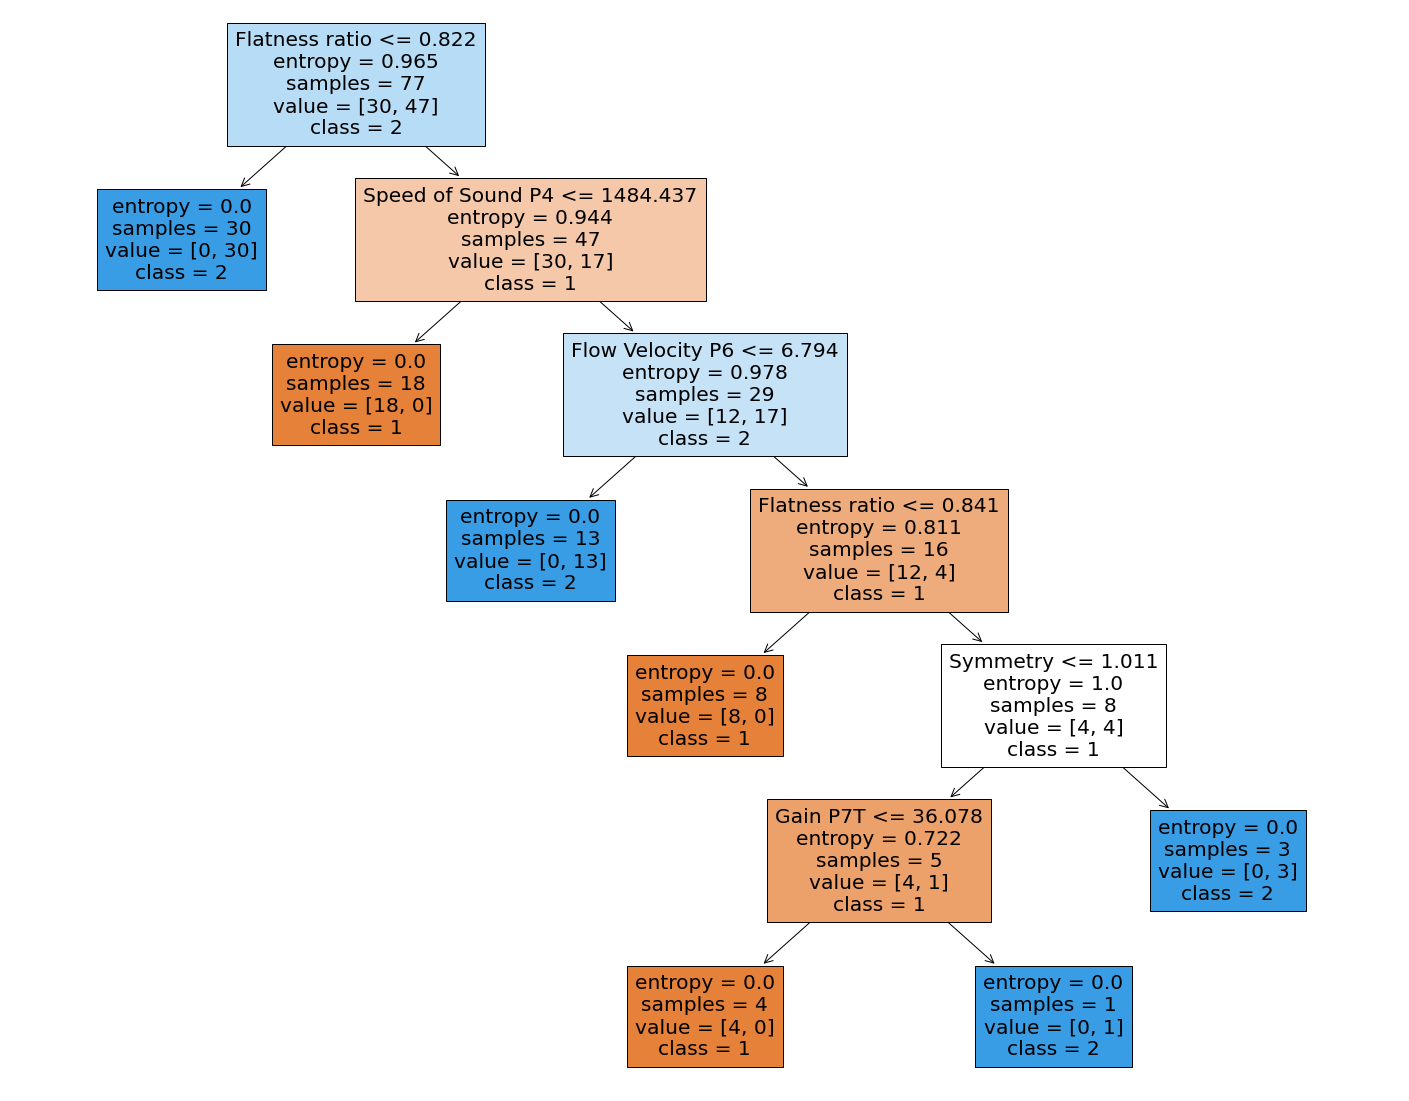

In [38]:
#Y = X_pca['Class']
Xdt = data_no_outlier.drop(['Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=9)
clf = clf.fit(Xdt, Y)

from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=Xdt.columns,class_names=['1','2'],filled=True, impurity=True)

### Neural Network

Model score: 0.875
Highest training accuracy: 1.0
Highest testing accuracy: 0.9375
Lowest testing accuracy: 0.875


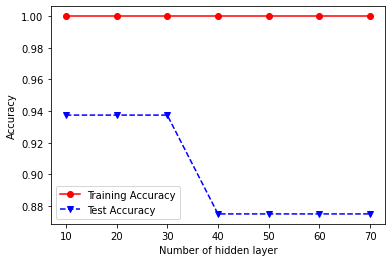

In [39]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf6 = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=0,max_iter=1000)
    clf6.fit(X_train, y_train)
 
    Y_predTrain = clf6.predict(X_train)
    Y_predTest = clf6.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))
    
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

print (f"Model score: {clf6.score(X_test, y_test)}")
print("Highest training accuracy:", max(trainAcc))
print("Highest testing accuracy:", max(testAcc))
print("Lowest testing accuracy:", min(testAcc))

### Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

clf2=GaussianNB()
clf2.fit(X_train, y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)
trainAcc=accuracy_score(y_train, Y_predTrain)
testAcc=accuracy_score(y_test, Y_predTest)

print (f"Model score: {clf2.score(X_test, y_test)}")
print("\nTraining Accuracy:",trainAcc)
print("\nTesting Accuracy:",testAcc)

Model score: 0.75

Training Accuracy: 0.7540983606557377

Testing Accuracy: 0.75


### Linear Discriminant

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print (f"Model score: {lda.score(X_test, y_test)}")
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Model score: 0.6875
Accuracy of LDA classifier on training set: 0.74
Accuracy of LDA classifier on test set: 0.69


## Unsupervised Learning - KNN K means
### K Nearest Neighbours

Model score: 0.75
Highest training accuracy: 1.0
Highest testing accuracy: 0.875
Lowest testing accuracy: 0.6875


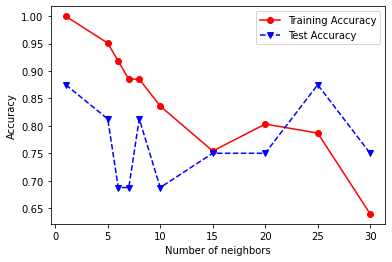

In [42]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 6,7,8, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(X_train, y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print (f"Model score: {clf1.score(X_test, y_test)}")
print("Highest training accuracy:", max(trainAcc))
print("Highest testing accuracy:", max(testAcc))
print("Lowest testing accuracy:", min(testAcc))

K-means clustering

C:\Users\Fishsticks\.conda\envs\CSC3005\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


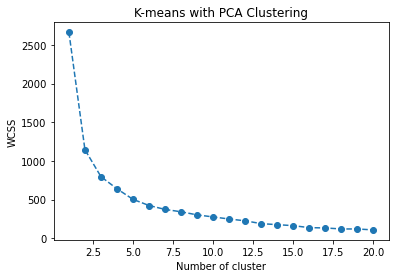

In [43]:
from sklearn import cluster

wcss =[]
for i in range(1,21):
    kmeans_pca = cluster.KMeans(n_clusters =i,init='k-means++',random_state=0)
    kmeans_pca.fit(X_pca)
    wcss.append(kmeans_pca.inertia_)
    
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

We can see the elbow at 3 classes

In [44]:
kmeans_pca = cluster.KMeans(n_clusters =2,init='k-means++',random_state=0)
kmeans_pca.fit(X_pca)

KMeans(n_clusters=2, random_state=0)

In [45]:
df_segm_pca_kmeans = pd.concat([data_no_outlier.reset_index(drop=True),pd.DataFrame(X_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-4:] =['PC1','PC2','PC3','PC4']
df_segm_pca_kmeans['K-means']= kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Flatness ratio,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Flow Velocity P5,Flow Velocity P6,Flow Velocity P7,...,Gain P7T,Gain P7R,Gain P8T,Gain P8R,Class,PC1,PC2,PC3,PC4,K-means
0,0.84150,1.00937,0.99382,8.46981,10.27873,10.03776,8.50136,8.58173,10.24776,10.05882,...,36.07585,36.05143,35.17415,32.72949,1,11.76312,-5.03836,-1.08140,-0.69268,1
1,0.84225,1.00658,0.99661,7.53189,9.13992,8.95162,7.61221,7.62333,9.10635,8.94514,...,36.05469,35.97982,34.84701,32.73112,1,11.00786,-0.20206,-3.06547,-0.86692,1
2,0.84072,1.01165,0.99815,6.64170,7.97546,7.85769,6.59312,6.68157,7.96460,7.81470,...,36.00261,35.96354,34.68913,32.77181,1,8.58855,1.44874,-3.47286,-0.34403,1
3,0.84112,1.01781,0.99681,5.68752,6.82433,6.68988,5.61543,5.76332,6.80105,6.68664,...,35.97494,35.95540,34.50033,32.84994,1,2.90846,-1.62363,0.47756,0.52340,1
4,0.84036,1.01653,0.99622,5.66038,6.82956,6.67563,5.62398,5.73682,6.81345,6.67238,...,35.99609,35.96843,34.47428,32.85319,1,1.41546,-3.27821,3.08102,0.48817,1


### Scatterplots using K-means

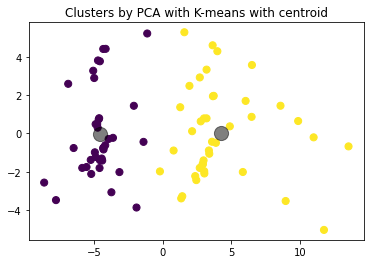

In [46]:
df_segm_pca_kmeans['Class']=df_segm_pca_kmeans['K-means'].map({0:1,1:2,2:3})

x_axis= df_segm_pca_kmeans['PC1']
y_axis= df_segm_pca_kmeans['PC2']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, s=50, cmap='viridis')
centers = kmeans_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#sns.scatterplot(x_axis,y_axis,hue=df_segm_pca_kmeans['Class'],palette=['g','r'])
plt.title('Clusters by PCA with K-means with centroid')
plt.show()

C:\Users\Fishsticks\AppData\Local\Temp\ipykernel_304\2335112636.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure(figsize=(12,9)).gca(projection='3d')


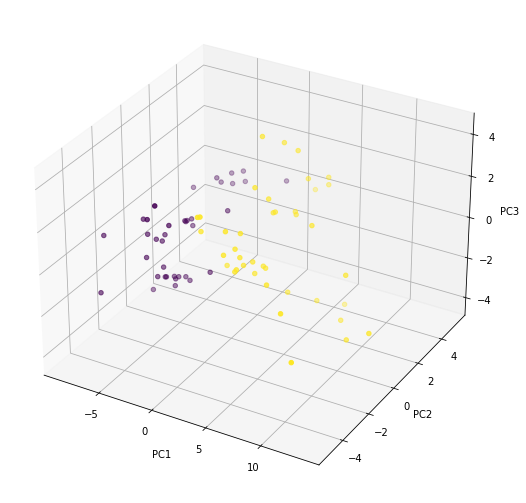

In [47]:
fig = plt.figure(figsize=(12,9)).gca(projection='3d')
fig.scatter(df_segm_pca_kmeans['PC1'],df_segm_pca_kmeans['PC2']
            ,df_segm_pca_kmeans['PC3'],cmap=plt.cm.get_cmap('viridis', 2),c=df_segm_pca_kmeans['Class'])
fig.set_xlabel('PC1')
fig.set_ylabel('PC2')
fig.set_zlabel('PC3')
_ = plt.show()

## Random Forest Classifier

In [48]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
# test set 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


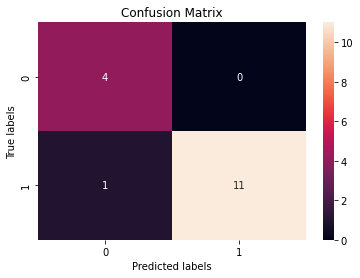

Accuracy : 0.9375


In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn

array_cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sn.heatmap(array_cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))